In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Question 1


In [2]:
def generate_confidence_intervals(n, alpha, m, mu=50, sigma=5, noise=False):
    mean_captures = 0
    var_captures = 0

    for _ in range(m):
        sample = np.random.normal(mu, sigma, n)
        if noise:
            sample += np.random.uniform(-1, 1, n)

        sample_mean = np.mean(sample)
        sample_var = np.var(sample, ddof=1)

        # Confidence interval for mean
        t_critical = stats.t.ppf(1 - alpha / 2, df=n-1)
        mean_margin = t_critical * (sigma / np.sqrt(n))
        mean_ci = (sample_mean - mean_margin, sample_mean + mean_margin)

        if mean_ci[0] <= mu <= mean_ci[1]:
            mean_captures += 1

        # Confidence interval for variance
        chi2_lower = stats.chi2.ppf(alpha / 2, df=n-1)
        chi2_upper = stats.chi2.ppf(1 - alpha / 2, df=n-1)
        var_ci = ((n-1) * sample_var / chi2_upper, (n-1) * sample_var / chi2_lower)

        if var_ci[0] <= sigma**2 <= var_ci[1]:
            var_captures += 1

    return mean_captures / m, var_captures / m

In [3]:
# Experiment Parameters
sample_sizes = [10, 30, 50, 100]
confidence_levels = [0.90, 0.95, 0.99]
m = 1000  # Number of iterations

results = {alpha: {"mean": [], "variance": [], "mean_noise": [], "variance_noise": []} for alpha in confidence_levels}

# Running simulations
for n in sample_sizes:
      for alpha in confidence_levels:
          mean_coverage, var_coverage = generate_confidence_intervals(n, 1-alpha, m)
          results[alpha]["mean"].append(mean_coverage)
          results[alpha]["variance"].append(var_coverage)

          print(f"Sample Size: {n}, Confidence Level: {alpha}")
          print(f"- Mean Coverage (No Noise): {mean_coverage:.3f}")
          print(f"- Variance Coverage (No Noise): {var_coverage:.3f}")

          mean_coverage_noise, var_coverage_noise = generate_confidence_intervals(n, 1-alpha, m, noise=True)
          results[alpha]["mean_noise"].append(mean_coverage_noise)
          results[alpha]["variance_noise"].append(var_coverage_noise)

          print(f"- Mean Coverage (With Noise): {mean_coverage_noise:.3f}")
          print(f"- Variance Coverage (With Noise): {var_coverage_noise:.3f}")
          print()

Sample Size: 10, Confidence Level: 0.9
- Mean Coverage (No Noise): 0.931
- Variance Coverage (No Noise): 0.895
- Mean Coverage (With Noise): 0.932
- Variance Coverage (With Noise): 0.880

Sample Size: 10, Confidence Level: 0.95
- Mean Coverage (No Noise): 0.975
- Variance Coverage (No Noise): 0.963
- Mean Coverage (With Noise): 0.973
- Variance Coverage (With Noise): 0.952

Sample Size: 10, Confidence Level: 0.99
- Mean Coverage (No Noise): 1.000
- Variance Coverage (No Noise): 0.987
- Mean Coverage (With Noise): 0.998
- Variance Coverage (With Noise): 0.995

Sample Size: 30, Confidence Level: 0.9
- Mean Coverage (No Noise): 0.910
- Variance Coverage (No Noise): 0.909
- Mean Coverage (With Noise): 0.901
- Variance Coverage (With Noise): 0.891

Sample Size: 30, Confidence Level: 0.95
- Mean Coverage (No Noise): 0.963
- Variance Coverage (No Noise): 0.949
- Mean Coverage (With Noise): 0.955
- Variance Coverage (With Noise): 0.941

Sample Size: 30, Confidence Level: 0.99
- Mean Coverage (

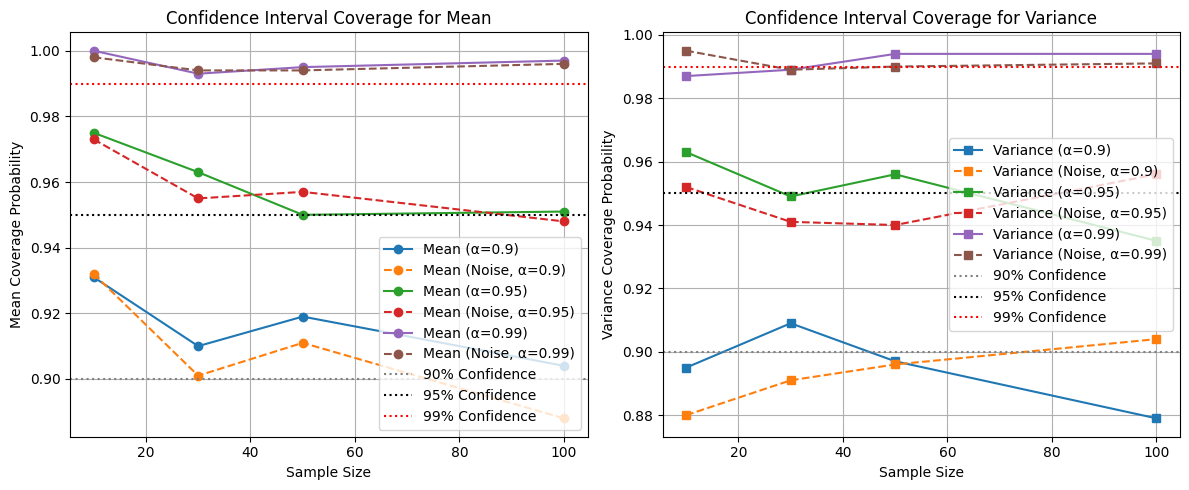

In [4]:
# Plot results
plt.figure(figsize=(12, 5))

# Mean Coverage Plot
plt.subplot(1, 2, 1)
for alpha in confidence_levels:
    plt.plot(sample_sizes, results[alpha]["mean"], label=f"Mean (α={alpha})", marker="o")
    plt.plot(sample_sizes, results[alpha]["mean_noise"], linestyle="dashed", label=f"Mean (Noise, α={alpha})", marker="o")

plt.axhline(y=0.90, color='gray', linestyle='dotted', label="90% Confidence")
plt.axhline(y=0.95, color='black', linestyle='dotted', label="95% Confidence")
plt.axhline(y=0.99, color='red', linestyle='dotted', label="99% Confidence")

plt.xlabel("Sample Size")
plt.ylabel("Mean Coverage Probability")
plt.title("Confidence Interval Coverage for Mean")
plt.legend()
plt.grid(True)

# Variance Coverage Plot
plt.subplot(1, 2, 2)
for alpha in confidence_levels:
    plt.plot(sample_sizes, results[alpha]["variance"], label=f"Variance (α={alpha})", marker="s")
    plt.plot(sample_sizes, results[alpha]["variance_noise"], linestyle="dashed", label=f"Variance (Noise, α={alpha})", marker="s")

plt.axhline(y=0.90, color='gray', linestyle='dotted', label="90% Confidence")
plt.axhline(y=0.95, color='black', linestyle='dotted', label="95% Confidence")
plt.axhline(y=0.99, color='red', linestyle='dotted', label="99% Confidence")

plt.xlabel("Sample Size")
plt.ylabel("Variance Coverage Probability")
plt.title("Confidence Interval Coverage for Variance")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

##Question 2


In [5]:
def confidence_interval_experiment(n1, n2, mu1, mu2, sigma1, sigma2, confidence, m, add_noise=False):
    coverage_count = 0  # Counter for successful intervals capturing true difference

    true_difference = mu1 - mu2  # Actual difference in means

    for _ in range(m):
        # Generate random samples from normal distributions
        sample1 = np.random.normal(mu1, sigma1, n1)
        sample2 = np.random.normal(mu2, sigma2, n2)

        if add_noise:
            sample1 += np.random.uniform(-1, 1, n1)  # Adding small random noise
            sample2 += np.random.uniform(-1, 1, n2)

        # Compute sample means and standard deviations
        xbar1, xbar2 = np.mean(sample1), np.mean(sample2)
        s1, s2 = np.std(sample1, ddof=1), np.std(sample2, ddof=1)

        # Standard error of the mean difference
        se_diff = np.sqrt((s1 ** 2 / n1) + (s2 ** 2 / n2))

        # Compute t-critical value for the given confidence level
        df = min(n1 - 1, n2 - 1)  # Degrees of freedom approximation
        t_critical = stats.t.ppf((1 + confidence) / 2, df)

        # Compute confidence interval
        margin_of_error = t_critical * se_diff
        lower_bound = (xbar1 - xbar2) - margin_of_error
        upper_bound = (xbar1 - xbar2) + margin_of_error

        # Check if the true difference falls within the interval
        if lower_bound <= true_difference <= upper_bound:
            coverage_count += 1

    # Compute coverage probability
    coverage_probability = coverage_count / m
    return coverage_probability

In [6]:
# Parameters
n_values = [30, 50, 100]  # Different sample sizes
confidence_levels = [0.90, 0.95, 0.99]  # Confidence levels
m = 1000  # Number of experiments
mu1, mu2 = 10, 8  # True means of two formulations
sigma1, sigma2 = 3, 3  # Standard deviations

results = {"Sample Size": [], "Confidence Level": [], "Coverage Probability": [], "Noise": []}

# Running experiments
for n in n_values:
      for confidence in confidence_levels:
          # Without noise
          coverage_no_noise = confidence_interval_experiment(n, n, mu1, mu2, sigma1, sigma2, confidence, m, add_noise=False)
          # With noise
          coverage_with_noise = confidence_interval_experiment(n, n, mu1, mu2, sigma1, sigma2, confidence, m, add_noise=True)

          results["Sample Size"].extend([n, n])
          results["Confidence Level"].extend([confidence, confidence])
          results["Coverage Probability"].extend([coverage_no_noise, coverage_with_noise])
          results["Noise"].extend(["No Noise", "With Noise"])

          print(f"Sample Size: ({n}, {n}), Confidence Level: {confidence}")
          print(f"Coverage Probability (No Noise): {coverage_no_noise:.3f}")
          print(f"Coverage Probability (With Noise): {coverage_with_noise:.3f}\n")

Sample Size: (30, 30), Confidence Level: 0.9
Coverage Probability (No Noise): 0.904
Coverage Probability (With Noise): 0.902

Sample Size: (30, 30), Confidence Level: 0.95
Coverage Probability (No Noise): 0.949
Coverage Probability (With Noise): 0.956

Sample Size: (30, 30), Confidence Level: 0.99
Coverage Probability (No Noise): 0.994
Coverage Probability (With Noise): 0.991

Sample Size: (50, 50), Confidence Level: 0.9
Coverage Probability (No Noise): 0.919
Coverage Probability (With Noise): 0.886

Sample Size: (50, 50), Confidence Level: 0.95
Coverage Probability (No Noise): 0.943
Coverage Probability (With Noise): 0.945

Sample Size: (50, 50), Confidence Level: 0.99
Coverage Probability (No Noise): 0.993
Coverage Probability (With Noise): 0.992

Sample Size: (100, 100), Confidence Level: 0.9
Coverage Probability (No Noise): 0.903
Coverage Probability (With Noise): 0.907

Sample Size: (100, 100), Confidence Level: 0.95
Coverage Probability (No Noise): 0.946
Coverage Probability (Wit

In [7]:
df = pd.DataFrame(results)

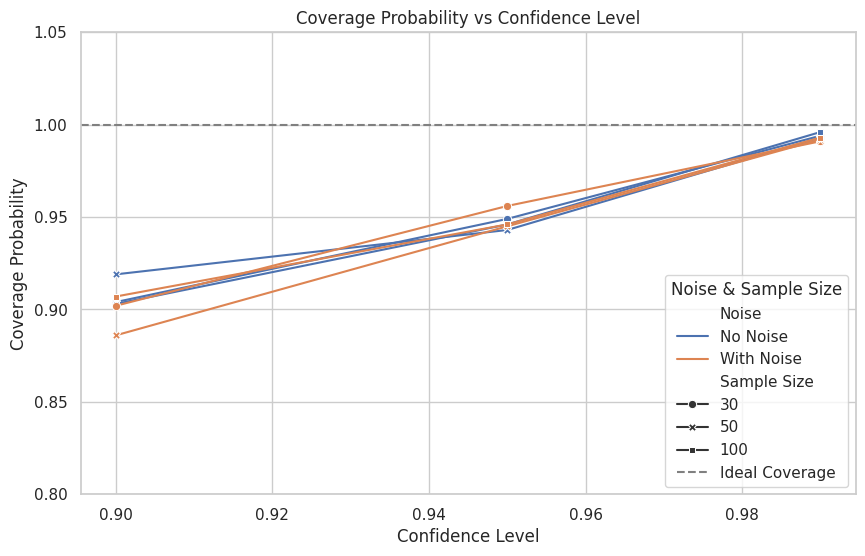

In [8]:
# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create a line plot with confidence level on the x-axis and coverage probability on the y-axis
sns.lineplot(
    data=df,
    x="Confidence Level",
    y="Coverage Probability",
    hue="Noise",
    style="Sample Size",
    markers=True,
    dashes=False
)

plt.axhline(y=1.0, linestyle="--", color="gray", label="Ideal Coverage")
plt.ylim(0.8, 1.05)
plt.title("Coverage Probability vs Confidence Level")
plt.xlabel("Confidence Level")
plt.ylabel("Coverage Probability")
plt.legend(title="Noise & Sample Size")
plt.show()

## Question 3

In [9]:
def confidence_interval_polling(n, p, confidence, m):
    coverage_count = 0  # Counter for successful intervals capturing the true proportion

    for _ in range(m):
        # Generate survey responses (1 for Candidate A, 0 for Candidate B)
        sample = np.random.binomial(1, p, n)
        p_hat = np.mean(sample)  # Sample proportion

        # Standard error
        se = np.sqrt((p_hat * (1 - p_hat)) / n)

        # Compute z-critical value for the given confidence level
        z_critical = stats.norm.ppf((1 + confidence) / 2)

        # Compute confidence interval
        margin_of_error = z_critical * se
        lower_bound = max(0, p_hat - margin_of_error)  # Ensure valid probability bounds
        upper_bound = min(1, p_hat + margin_of_error)

        # Check if the true proportion falls within the interval
        if lower_bound <= p <= upper_bound:
            coverage_count += 1

    # Compute coverage probability
    coverage_probability = coverage_count / m
    return coverage_probability

In [10]:
# Parameters
n_values = [100, 500, 1000]  # Different sample sizes
confidence_levels = [0.90, 0.95, 0.99]  # Confidence levels
p_values = [0.45, 0.50, 0.55]  # Different true proportions
m = 1000  # Number of simulations

results = {"Sample Size": [], "Confidence Level": [], "Coverage Probability": [], "True Proportion": []}

# Running experiments
for n in n_values:
      for p in p_values:
          for confidence in confidence_levels:
              coverage_probability = confidence_interval_polling(n, p, confidence, m)
              results["Sample Size"].append(n)
              results["Confidence Level"].append(confidence)
              results["Coverage Probability"].append(coverage_probability)
              results["True Proportion"].append(p)
              print(f"Sample Size: {n}, True Proportion: {p}, Confidence Level: {confidence}")
              print(f"Coverage Probability: {coverage_probability:.3f}\n")

Sample Size: 100, True Proportion: 0.45, Confidence Level: 0.9
Coverage Probability: 0.895

Sample Size: 100, True Proportion: 0.45, Confidence Level: 0.95
Coverage Probability: 0.948

Sample Size: 100, True Proportion: 0.45, Confidence Level: 0.99
Coverage Probability: 0.988

Sample Size: 100, True Proportion: 0.5, Confidence Level: 0.9
Coverage Probability: 0.909

Sample Size: 100, True Proportion: 0.5, Confidence Level: 0.95
Coverage Probability: 0.951

Sample Size: 100, True Proportion: 0.5, Confidence Level: 0.99
Coverage Probability: 0.988

Sample Size: 100, True Proportion: 0.55, Confidence Level: 0.9
Coverage Probability: 0.891

Sample Size: 100, True Proportion: 0.55, Confidence Level: 0.95
Coverage Probability: 0.948

Sample Size: 100, True Proportion: 0.55, Confidence Level: 0.99
Coverage Probability: 0.982

Sample Size: 500, True Proportion: 0.45, Confidence Level: 0.9
Coverage Probability: 0.881

Sample Size: 500, True Proportion: 0.45, Confidence Level: 0.95
Coverage Prob

In [11]:
df = pd.DataFrame(results)

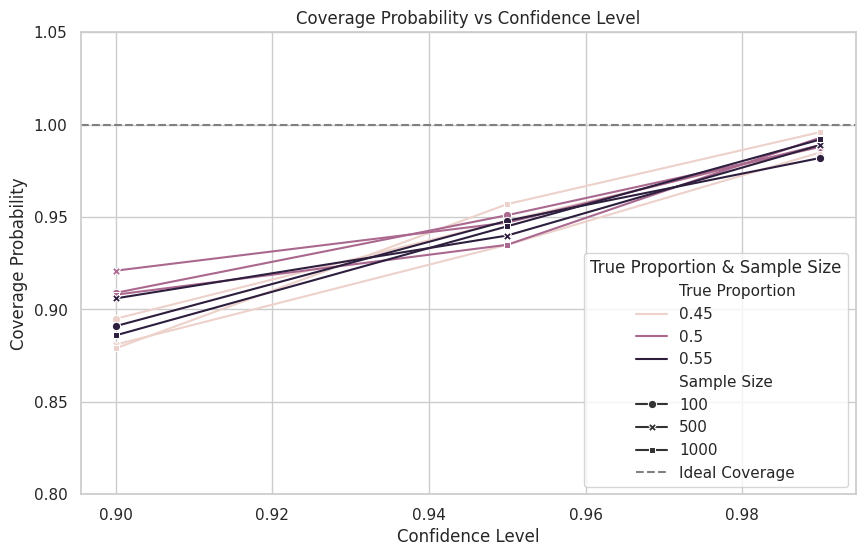

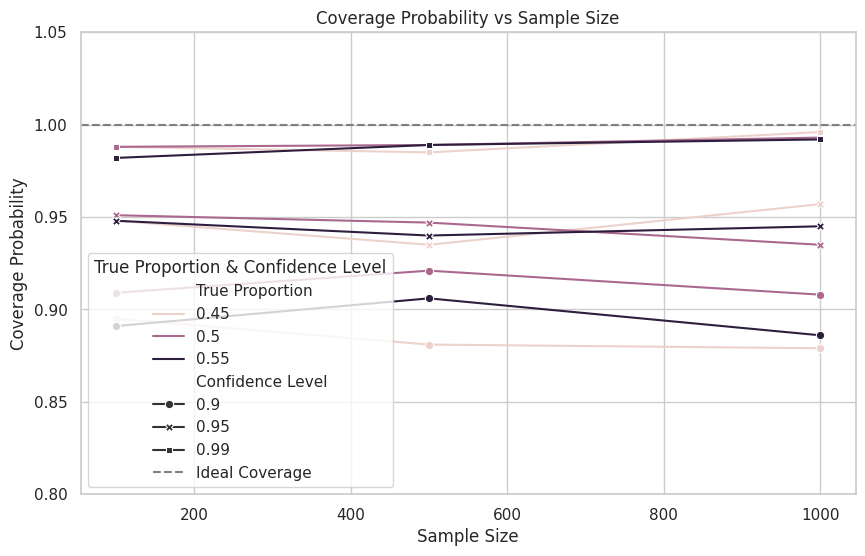

In [12]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df,
    x="Confidence Level",
    y="Coverage Probability",
    hue="True Proportion",
    style="Sample Size",
    markers=True,
    dashes=False
)
plt.axhline(y=1.0, linestyle="--", color="gray", label="Ideal Coverage")
plt.ylim(0.8, 1.05)
plt.title("Coverage Probability vs Confidence Level")
plt.xlabel("Confidence Level")
plt.ylabel("Coverage Probability")
plt.legend(title="True Proportion & Sample Size")
plt.show()

# Plot 2: Coverage Probability vs. Sample Size
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df,
    x="Sample Size",
    y="Coverage Probability",
    hue="True Proportion",
    style="Confidence Level",
    markers=True,
    dashes=False
)
plt.axhline(y=1.0, linestyle="--", color="gray", label="Ideal Coverage")
plt.ylim(0.8, 1.05)
plt.title("Coverage Probability vs Sample Size")
plt.xlabel("Sample Size")
plt.ylabel("Coverage Probability")
plt.legend(title="True Proportion & Confidence Level")
plt.show()